# Web Scraping: Una Herramienta Clave en Ciencia de Datos

## Introducción
El web scraping, también conocido como recolección de datos web o extracción de datos web, es una técnica utilizada para extraer grandes cantidades de datos de sitios web. Los datos en los sitios web son no estructurados, y el web scraping nos permite convertirlos en una forma estructurada.

## Importancia del Web Scraping en la Ciencia de Datos
En el campo de la ciencia de datos, el web scraping desempeña un papel integral. Se utiliza para diversos propósitos, como:

1. Recolección de Datos: El web scraping es un método principal para recopilar datos de internet. Estos datos pueden ser utilizados para análisis, investigación, etc.
2. Aplicaciones en Tiempo Real: El web scraping se utiliza para aplicaciones en tiempo real como actualizaciones del clima, comparación de precios, etc.
3. Aprendizaje Automático: El web scraping proporciona los datos necesarios para entrenar modelos de aprendizaje automático.
   
## Extracción de datos web con Python
Python proporciona varias bibliotecas para la extracción de datos web. Aquí hay algunas de ellas:

1. BeautifulSoup: BeautifulSoup es una biblioteca de Python utilizada para la extracción de datos web con el fin de extraer datos de archivos HTML y XML. Crea un árbol de análisis a partir del código fuente de la página que se puede utilizar para extraer datos de manera jerárquica y más legible.

```python
from bs4 import BeautifulSoup
import requests
URL = "http://www.example.com"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
```

2. Scrapy: Scrapy es un marco de trabajo de rastreo web de código abierto y colaborativo para Python. Se utiliza para extraer datos de los sitios web.
```python   
import scrapy
class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = ['http://quotes.toscrape.com/tag/humor/',]
    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {'quote': quote.css('span.text::text').get()}
```

3. Selenium: Selenium es una herramienta utilizada para controlar navegadores web a través de programas y automatizar tareas en el navegador.

```python
from selenium import webdriver
driver = webdriver.Firefox()
driver.get("http://www.example.com")
```

## Aplicaciones de Web Scraping
El web scraping se utiliza en diversos campos y tiene muchas aplicaciones:

1. Comparación de Precios: Servicios como ParseHub utilizan web scraping para recopilar datos de sitios web de compras en línea y usarlos para comparar los precios de productos.

2. Recopilación de direcciones de correo electrónico: Muchas empresas que utilizan el correo electrónico como medio de marketing, utilizan web scraping para recopilar identificaciones de correo electrónico y luego enviar correos masivos.

3. Scraping de Redes Sociales: El web scraping se utiliza para recopilar datos de sitios web de redes sociales como Twitter para averiguar qué está en tendencia.


## Extracción de Tablas Web usando Pandas

La biblioteca Pandas en Python contiene una función read_html() que se puede utilizar para extraer información tabular de cualquier página web.

Consideremos el siguiente ejemplo:

Supongamos que queremos extraer la lista de los bancos más grandes del mundo por capitalización de mercado, desde el siguiente enlace:

```python
URL = 'https://en.wikipedia.org/wiki/List_of_largest_banks'
```

Podemos usar la función pandas.read_html() en Python para extraer todas las tablas de la página web directamente.

A continuación se muestra una captura de la página web.

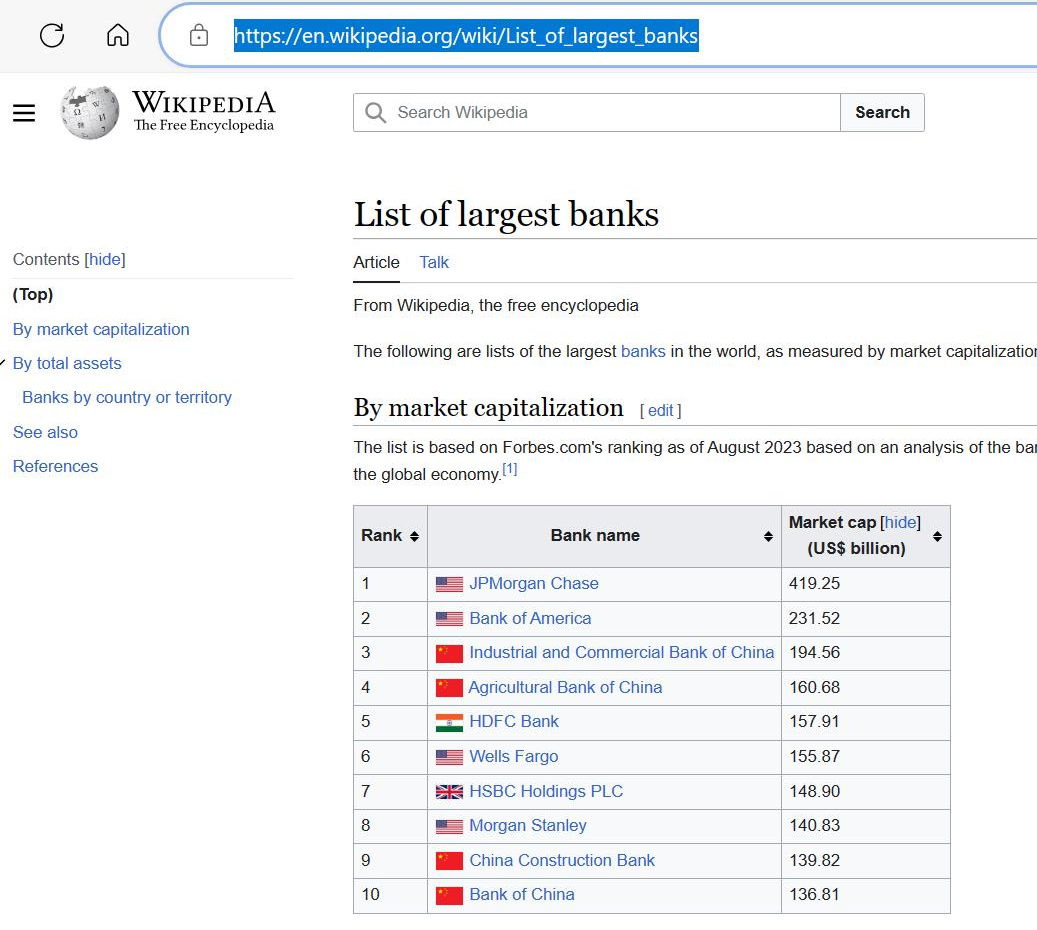

Podemos ver que la tabla requerida es la primera en la página web.

>Nota: Esta es una página web en vivo y puede actualizarse con el tiempo. La imagen mostrada arriba fue capturada en noviembre de 2023. El proceso de extracción de datos sigue siendo el mismo.

Podemos ejecutar las siguientes líneas de código para extraer la tabla requerida de la página web.

In [2]:
#!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 110.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
URL = 'https://en.wikipedia.org/wiki/List_of_largest_banks'
tables = pd.read_html(URL)
df = tables[0]
print(df)

    Rank                                Bank name  \
0      1  Industrial and Commercial Bank of China   
1      2               Agricultural Bank of China   
2      3                  China Construction Bank   
3      4                            Bank of China   
4      5                           JPMorgan Chase   
..   ...                                      ...   
95    96                            Handelsbanken   
96    97                 Industrial Bank of Korea   
97    98                                      DNB   
98    99                      Qatar National Bank   
99   100                  National Bank of Canada   

    Total assets (2024) (US$ billion)  
0                             6303.44  
1                             5623.12  
2                             5400.28  
3                             4578.28  
4                             4002.81  
..                                ...  
95                             351.79  
96                             345.81  
97 

Aunque es conveniente, este método tiene sus propias limitaciones.
En primer lugar, las páginas web pueden tener contenido guardado en ellas como tablas, pero pueden no aparecer como tablas en la página web.

Por ejemplo, considera la siguiente URL que muestra la lista de países por PIB (nominal).

```python
URL = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
```

Las imágenes en la página web también se guardan en formato tabular. A continuación se comparte una captura de la página web.
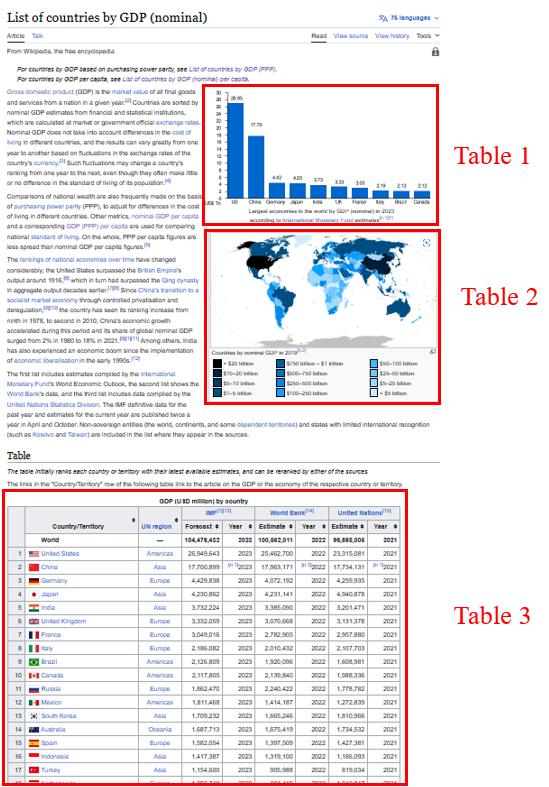

En segundo lugar, el contenido de las tablas en las páginas web puede contener elementos como texto de hipervínculo y otros denotadores, que también se extraen directamente utilizando el método de pandas. Esto puede llevar a la necesidad de una limpieza adicional de los datos.
Una mirada más cercana a la tabla 3 en la imagen mostrada arriba indica que hay muchos textos de hipervínculo que también serán tratados como información por la función de pandas.
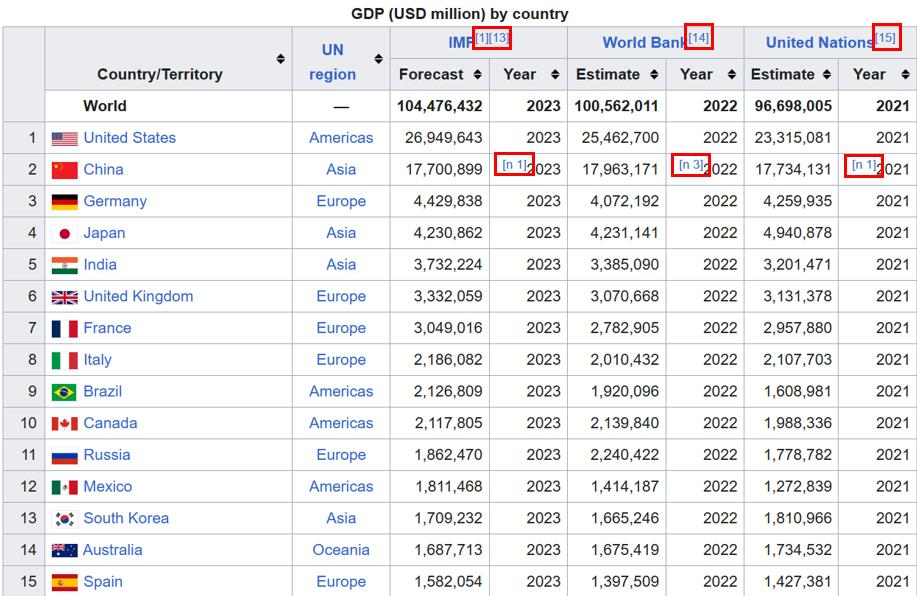

Podemos extraer la tabla utilizando el código que se muestra a continuación.

In [4]:
import pandas as pd
URL = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(URL)
df = tables[2] # the required table will have index 2
print(df)

    Country/Territory IMF[1][12]            World Bank[13]             \
    Country/Territory   Forecast       Year       Estimate       Year   
0               World  113795678       2025      111326370       2024   
1       United States   30507217       2025       29184890       2024   
2               China   19231705  [n 1]2025       18743803  [n 3]2024   
3             Germany    4744804       2025        4659929       2024   
4               India    4187017       2025        3912686       2024   
..                ...        ...        ...            ...        ...   
217          Kiribati        312       2025            308       2024   
218  Marshall Islands        297       2025            280       2024   
219             Nauru        169       2025            160       2024   
220        Montserrat          —          —              —          —   
221            Tuvalu         65       2025             62       2023   

    United Nations[14]             
              

La salida de la instrucción de impresión se muestra a continuación.

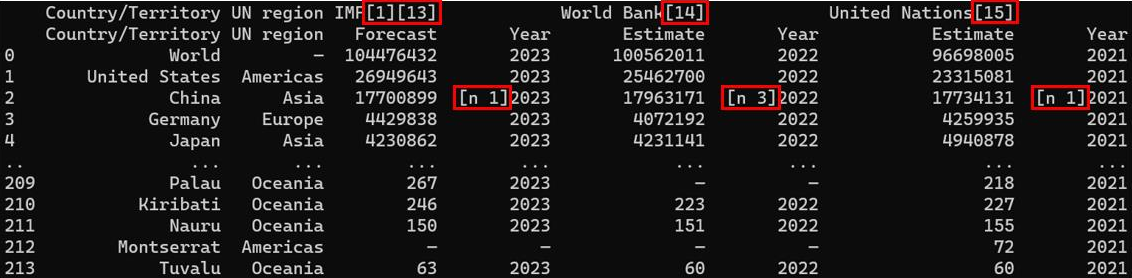

Tenga en cuenta que los textos de los hipervínculos también se han mantenido en la salida del código.

Además, es prudente señalar que este método opera exclusivamente en la extracción de datos tabulares. La biblioteca BeautifulSoup sigue siendo el método predeterminado para extraer cualquier tipo de información de las páginas web.

## Conclusión
El web scraping es una habilidad esencial en el mundo en rápido crecimiento de la ciencia de datos. Proporciona la capacidad de convertir la web en una fuente de datos que puede ser analizada, procesada y utilizada para una variedad de aplicaciones. Sin embargo, es importante recordar que se debe utilizar el web scraping de manera responsable y ética, respetando los términos de uso o los archivos robots.txt de los sitios web que se están raspando.